# Predictive Modeling for Stroke Occurence

## Introduction
 <p>Strokes are cerebrovascular accidents that cause brain cells to die from a blockage (ischemic) or bursting (hemorrhagic) of a blood vessel within the brain.  Stokes can cause an array of various complications, depending on the lesion site, ranging from loss of speech/language (aphasia), hemiparesis (one sided weakness), and even death $^{1}$. Strokes are the number 5 cause of death and the leading cause of disability in the United States yet according to Stroke.org, 80% of strokes are preventable $^{2}$. </p>
<p>Various lifestyle and medical factors, some of which are manageable, can contribute to the risk of stroke $^{1}$. The need to understand the nature of how these factors contribute is evident. In this analysis we will use a data set of 12 variables to create a model that predicts the occurence of a stroke. We will attempt to determine which factors, or combination of, are the most important in predicting the occurence of stroke.</p>
    
  **Sources**: 
  
 1. https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113 
  
 2. https://www.stroke.org/en/about-stroke
  

## Data

The data set contains 5110 observations on these 12 variables:

1. id
2. gender
3. age
4. hypertension
5. heart disease
6. marraige status
7. work type
8. residence type
9. average glucose level
10. body mass index
11. smoking status
12. stroke 

Id is an arbitrary number assigned to subjects for identification purposes so we will only test variables 2 through 11 to predict variable 12 (stroke). Gender, hypertension, heart disease, marraige status, residence type, and smoking status are categorical variables. We will assign the categories of these variables a numerical "dummy variable" if not already done. 


**Data source**: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [124]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [174]:
data = pd.read_csv('COGS109_Stroke.csv')

In [175]:
data.shape

(5110, 12)

In [163]:
# Drop rows with null values
data = data.dropna()

In [164]:
# Filter out rows wher stroke = 1
# Length = 209
stroke = data[data['stroke'] == 1]
not_stroke = data[data['stroke'] == 0]

In [165]:
len(stroke)

209

In [179]:
# Randomly smaple 209 data points from not stroke to balance data set
not_stroke2 = not_stroke.sample(n = 209,random_state = 1)

In [178]:
not_stroke2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2146,7868,Male,13.0,0,0,No,children,Rural,108.33,17.4,never smoked,0
4620,34940,Male,32.0,0,0,Yes,Private,Urban,90.28,39.6,never smoked,0
1169,39661,Male,18.0,0,0,Yes,Private,Rural,140.52,27.4,never smoked,0
3719,49095,Female,16.0,0,0,No,children,Urban,64.51,21.2,Unknown,0
4879,32617,Male,3.0,0,0,No,children,Urban,81.88,18.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4928,65469,Male,11.0,0,0,No,children,Rural,121.71,23.4,never smoked,0
352,40670,Female,20.0,0,0,No,Private,Rural,96.57,34.1,never smoked,0
2050,22689,Male,12.0,0,0,No,children,Rural,96.15,18.7,Unknown,0
870,28024,Male,49.0,0,0,Yes,Private,Rural,102.47,29.3,formerly smoked,0


In [176]:
data = stroke.append(not_stroke2)

In [177]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4928,65469,Male,11.0,0,0,No,children,Rural,121.71,23.4,never smoked,0
352,40670,Female,20.0,0,0,No,Private,Rural,96.57,34.1,never smoked,0
2050,22689,Male,12.0,0,0,No,children,Rural,96.15,18.7,Unknown,0
870,28024,Male,49.0,0,0,Yes,Private,Rural,102.47,29.3,formerly smoked,0


In [180]:
# Dummy variables for gender
data.loc[data['gender']== 'Female', 'gender'] = 0
data.loc[data['gender']== 'Male', 'gender'] = 1

#Dummy variables for ever_married
data.loc[data['ever_married']== 'No', 'ever_married'] = 0
data.loc[data['ever_married']== 'Yes', 'ever_married'] = 1

#Dummy variables for work type
data['work_type'].value_counts()
data.loc[data['work_type']== 'Private', 'work_type'] = 0
data.loc[data['work_type']== 'Self-employed', 'work_type'] = 1
data.loc[data['work_type']== 'Govt_job', 'work_type'] = 2
data.loc[data['work_type']== 'children', 'work_type'] = 3

#Dummy variables for residence type
data.loc[data['Residence_type']== 'Rural', 'Residence_type'] = 0
data.loc[data['Residence_type']== 'Urban', 'Residence_type'] = 1

#Dummy variables for smoking status
data.loc[data['smoking_status']== 'never smoked', 'smoking_status'] = 0
data.loc[data['smoking_status']== 'formerly smoked', 'smoking_status'] = 1
data.loc[data['smoking_status']== 'Unknown', 'smoking_status'] = 2
data.loc[data['smoking_status']== 'smokes', 'smoking_status'] = 3

## Visualizations

We will create visualizations of the data set in order to see if we can derive insights that will help build our model.

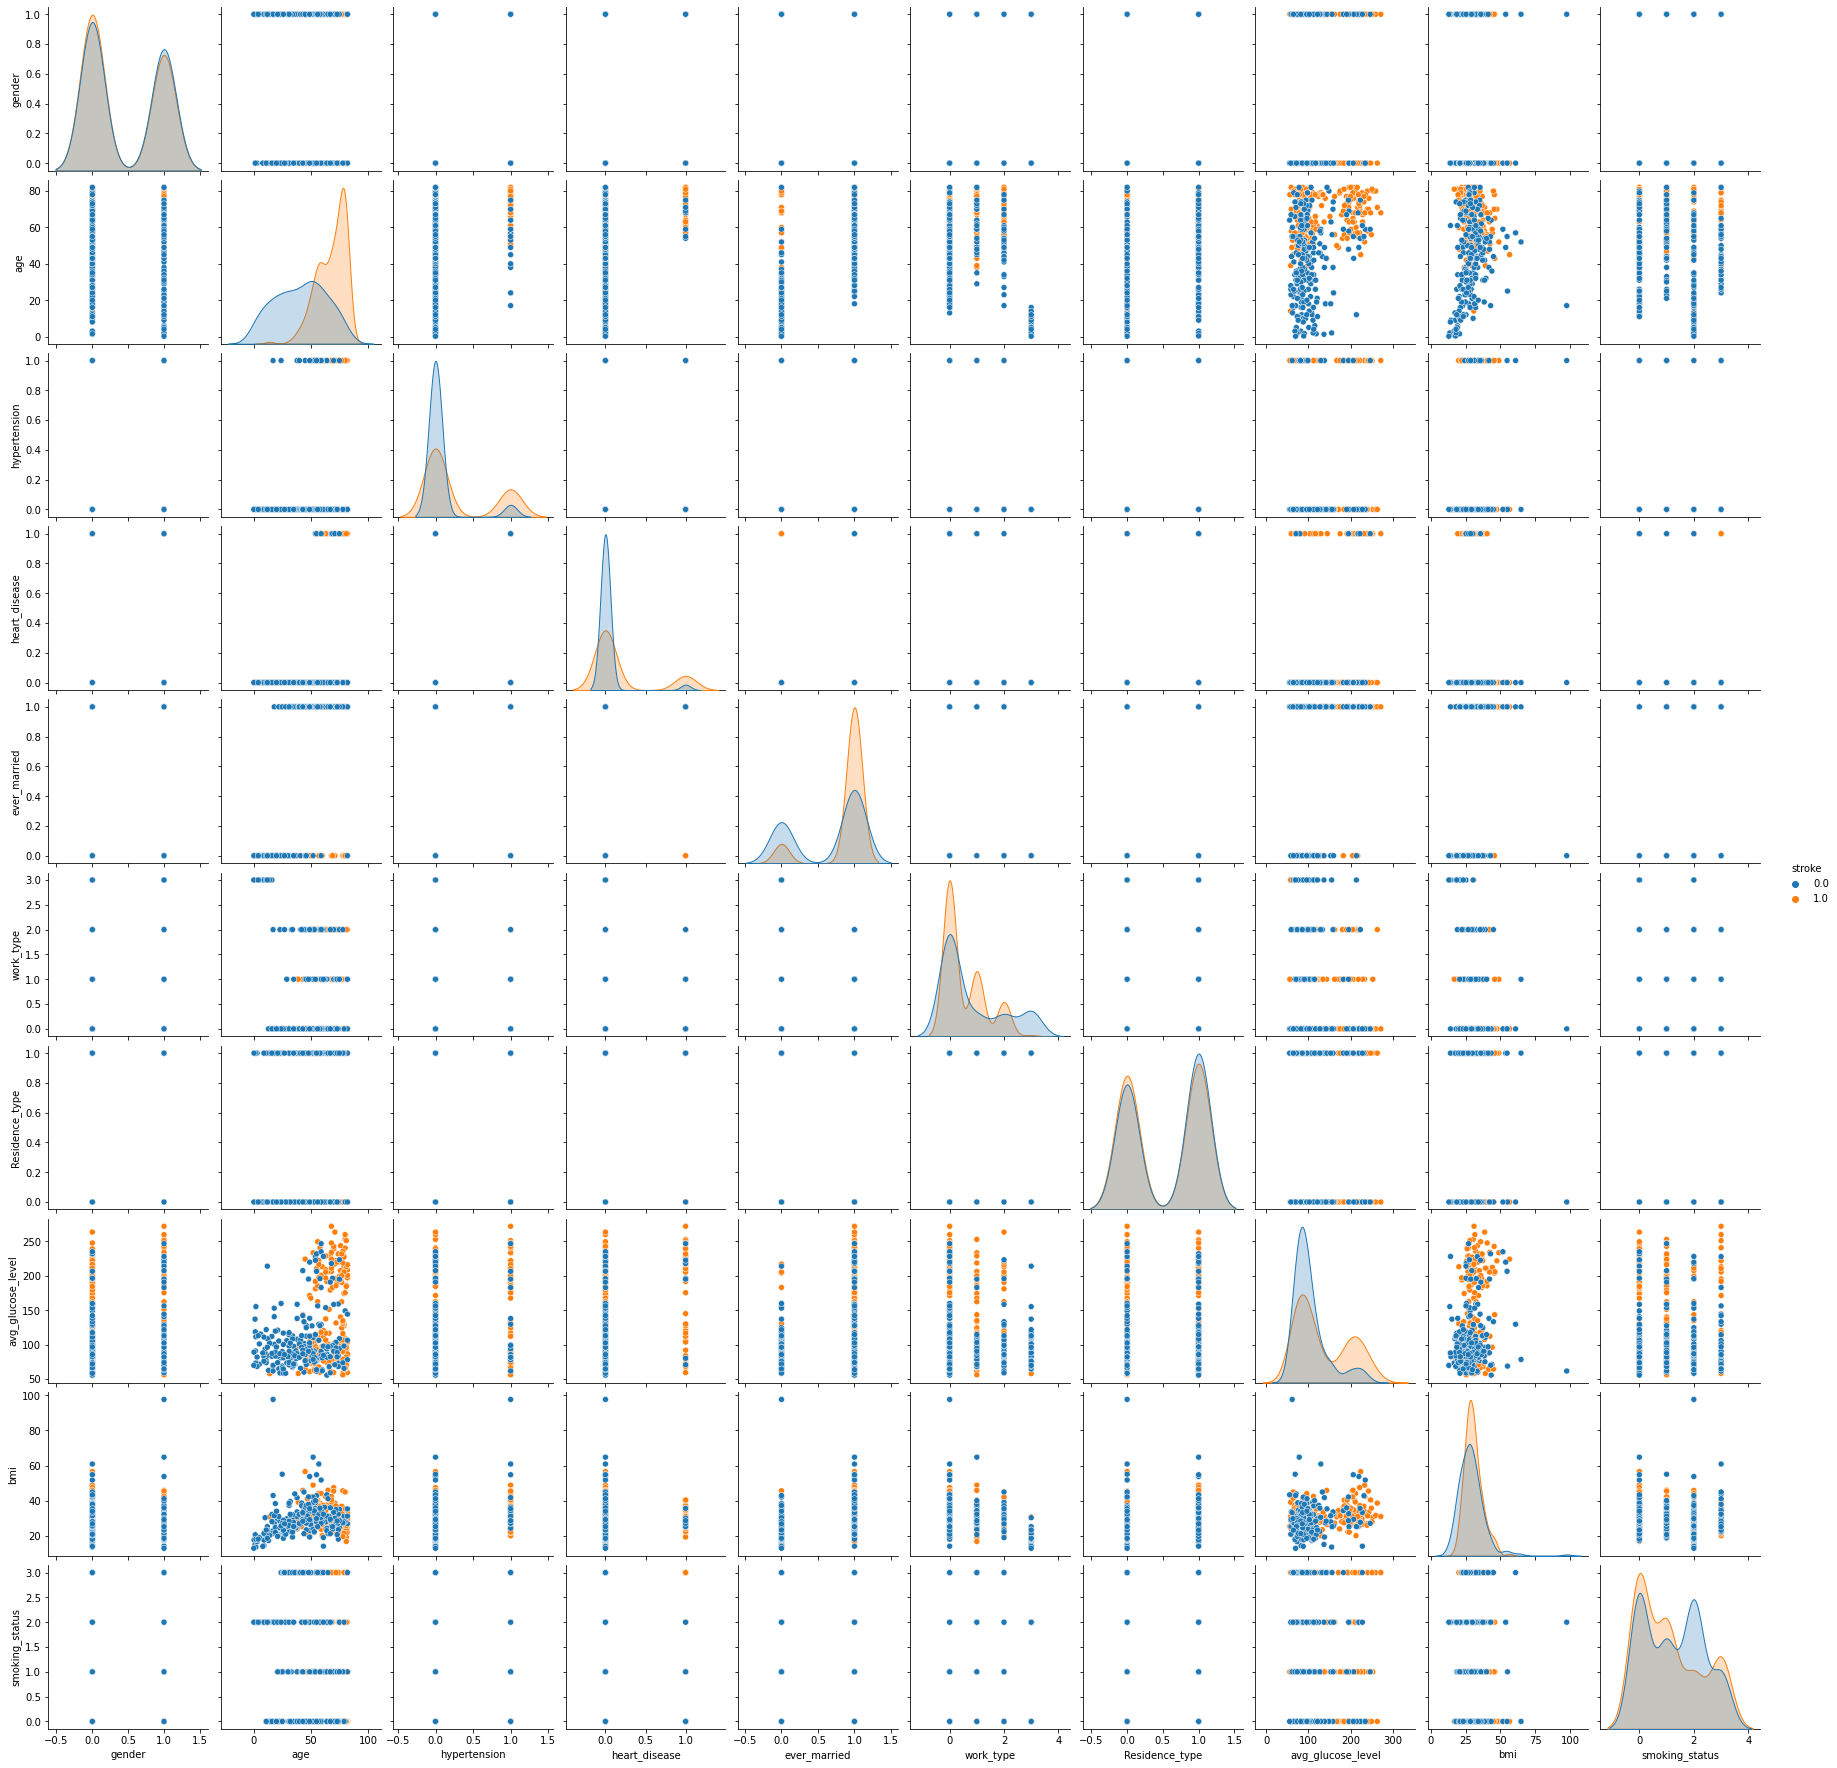

In [182]:
data = data.astype("float64")
sns.pairplot(data.iloc[0:len(data),1:12], hue = "stroke")

Text(0.5, 0, 'Avg. Blood Glucose Level')

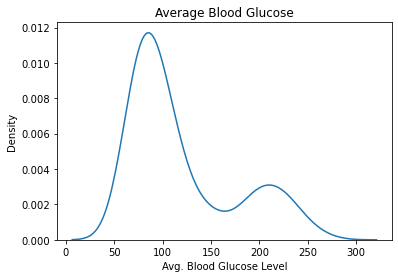

In [183]:
# Blood Glucose Level

sns.kdeplot(x = data['avg_glucose_level'])
plt.title('Average Blood Glucose')
plt.xlabel('Avg. Blood Glucose Level')

Text(0.5, 0, 'BMI')

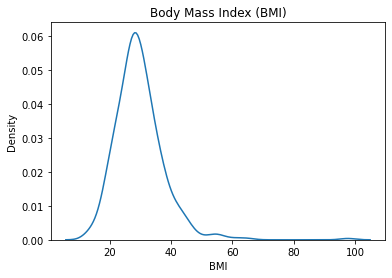

In [184]:
# BMI
sns.kdeplot(x = data['bmi'])
plt.title('Body Mass Index (BMI)')
plt.xlabel('BMI')

Text(0.5, 0, 'Age (Years)')

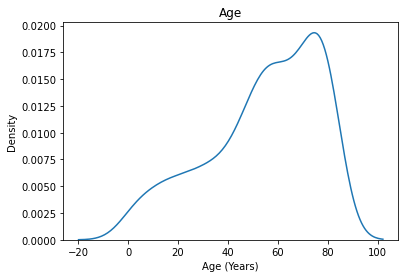

In [185]:
# Age
sns.kdeplot(x = data['age'])
plt.title('Age')
plt.xlabel('Age (Years)')

<AxesSubplot:xlabel='stroke', ylabel='count'>

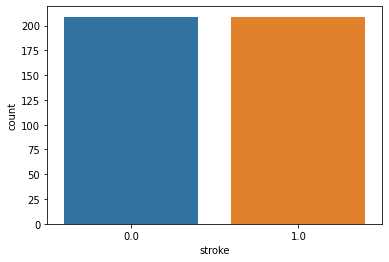

In [186]:
sns.countplot(x = data['stroke'])

<AxesSubplot:xlabel='gender', ylabel='count'>

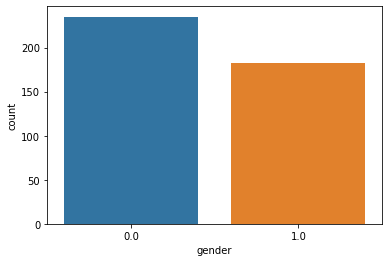

In [187]:
sns.countplot(x = data['gender'])

<AxesSubplot:xlabel='gender', ylabel='count'>

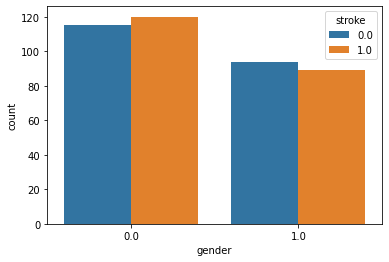

In [188]:
sns.countplot(x = data['gender'], hue = data['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='count'>

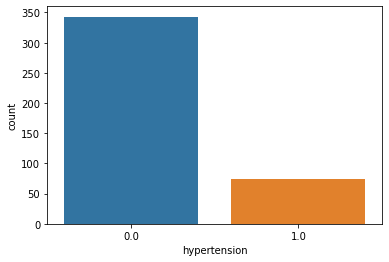

In [189]:
sns.countplot(x = data['hypertension'])

<AxesSubplot:xlabel='hypertension', ylabel='count'>

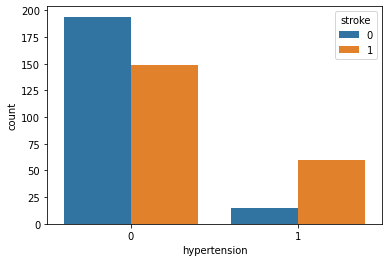

In [18]:
sns.countplot(x = data['hypertension'], hue = data['stroke'])

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

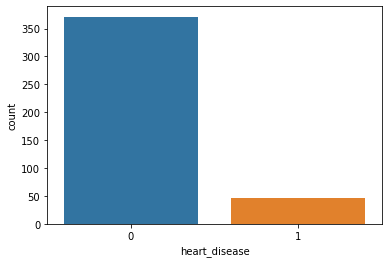

In [19]:
sns.countplot(x = data['heart_disease'])

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

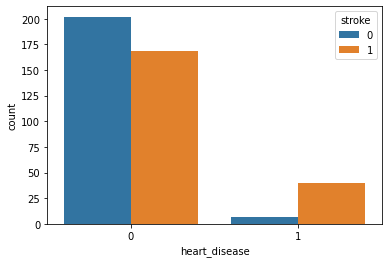

In [20]:
sns.countplot(x = data['heart_disease'],hue = data['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

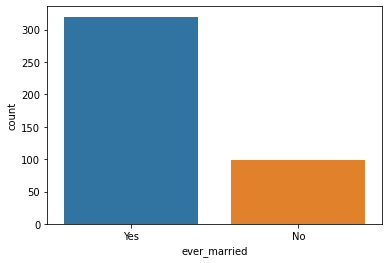

In [21]:
sns.countplot(x = data['ever_married'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

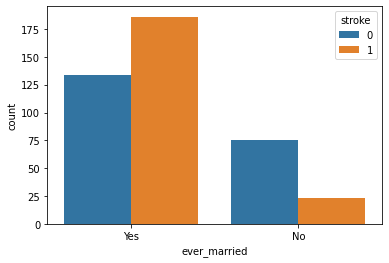

In [22]:
sns.countplot(x = data['ever_married'],hue = data['stroke'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

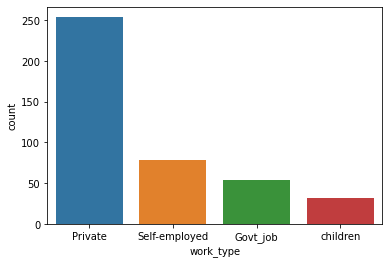

In [23]:
sns.countplot(x = data['work_type'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

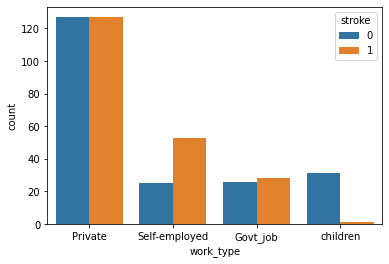

In [24]:
sns.countplot(x = data['work_type'], hue = data['stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

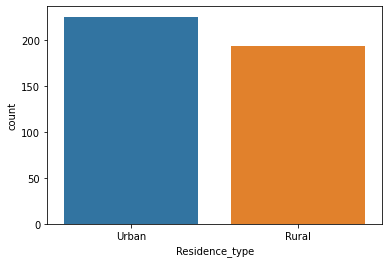

In [25]:
sns.countplot(x = data['Residence_type'])


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

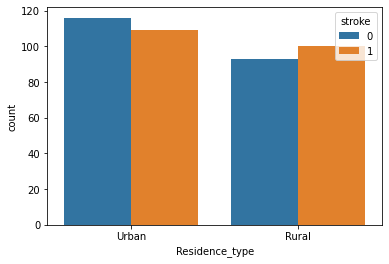

In [26]:
sns.countplot(x = data['Residence_type'], hue = data['stroke'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

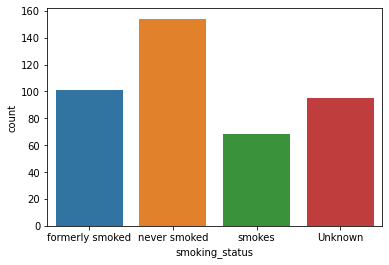

In [27]:
sns.countplot(x = data['smoking_status'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

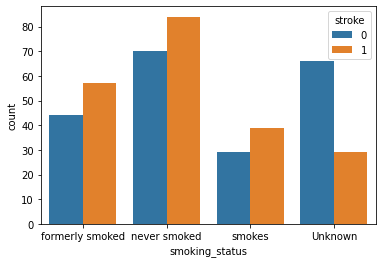

In [28]:
sns.countplot(x = data['smoking_status'], hue = data['stroke'])

## Compare the variables across stroke (1 or 0)

In [29]:
# Age

stroke['age'].mean()

67.71291866028709

In [30]:
not_stroke2['age'].mean()

40.90220095693779

In [31]:
# Mean BMI

stroke['bmi'].mean()


30.47129186602871

In [32]:
not_stroke2['bmi'].mean()

29.045454545454547

In [33]:
# Blood glucose level
stroke['avg_glucose_level'].mean()

134.5713875598086

In [34]:
not_stroke2['avg_glucose_level'].mean()

103.69296650717709

In [35]:
# Heart disease

data['heart_disease'].value_counts()

0    371
1     47
Name: heart_disease, dtype: int64

In [36]:
stroke['heart_disease'].value_counts()

0    169
1     40
Name: heart_disease, dtype: int64

In [37]:
# Percentage of people with heart disease who had a stroke
40/47

0.851063829787234

## Out of the people who have heart disease ~ 85% of them also had a stroke

In [38]:
# Hypertension
data['hypertension'].value_counts()

0    343
1     75
Name: hypertension, dtype: int64

In [39]:
stroke['hypertension'].value_counts()

0    149
1     60
Name: hypertension, dtype: int64

In [40]:
# Percentage of people with hypertension who had a stroke
60/78

0.7692307692307693

## Out of the people who have hypertension ~76% of them also had a stroke

In [41]:
# Gender
data['gender'].value_counts()

Female    235
Male      183
Name: gender, dtype: int64

In [42]:
stroke['gender'].value_counts()

Female    120
Male       89
Name: gender, dtype: int64

In [55]:
# Female to male ratio 
235/183

1.284153005464481

In [44]:
# Stroke F to M ratio
120/89

1.348314606741573

In [45]:
# Smoking
data['smoking_status'].value_counts()

never smoked       154
formerly smoked    101
Unknown             95
smokes              68
Name: smoking_status, dtype: int64

In [46]:
stroke['smoking_status'].value_counts()

never smoked       84
formerly smoked    57
smokes             39
Unknown            29
Name: smoking_status, dtype: int64

In [53]:
# Stroke formally smoked
57/101

0.5643564356435643

In [54]:
# Strokes smokes
39/68

0.5735294117647058

In [49]:
# Married

data['ever_married'].value_counts()

Yes    320
No      98
Name: ever_married, dtype: int64

In [50]:
stroke['ever_married'].value_counts()

Yes    186
No      23
Name: ever_married, dtype: int64

In [52]:
# PErcentage of married people who had a stroke
186/320

0.58125

# Significant Variables


- Age
- Blood Glucose Level
- Heart Disease 
- Hypertension